In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
#Import necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('mode.chained_assignment', None)

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score, roc_curve,classification_report, confusion_matrix,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=2)
NB=GaussianNB()
RF=RandomForestClassifier()


In [0]:
data=pd.read_csv('drive/My Drive/train.csv')

In [0]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [0]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [0]:
data.is_promoted.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [0]:
edu=data[data.education.notnull()]
pyr=data[data.previous_year_rating.notnull()]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [0]:
data.education.value_counts(normalize=True)


Bachelor's          0.699803
Master's & above    0.284834
Below Secondary     0.015363
Name: education, dtype: float64

In [0]:
pro=data[data['is_promoted']==1]
npro=data[data['is_promoted']==0]

In [0]:
pro.is_promoted.value_counts()

1    4668
Name: is_promoted, dtype: int64

In [0]:
edu.education.mode()

0    Bachelor's
dtype: object

In [0]:
pro.isna().sum()

employee_id               0
department                0
region                    0
education               122
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    339
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64

In [0]:

pro.education.fillna(edu.education.mode().iloc[0],inplace=True)

In [0]:
edu.education.mode().iloc[0]

"Bachelor's"

In [0]:
pyr.previous_year_rating.value_counts(normalize=True)

3.0    0.367335
5.0    0.231651
4.0    0.194874
1.0    0.122780
2.0    0.083360
Name: previous_year_rating, dtype: float64

In [0]:
pyr.previous_year_rating.mode()

0    3.0
dtype: float64

In [0]:

pro.previous_year_rating.fillna(pyr.previous_year_rating.mode().iloc[0],inplace=True)

In [0]:
npro.dropna(inplace=True)

In [0]:
df=pd.concat([pro,npro],axis=0)

In [0]:
pro.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,Bachelor's,m,other,1,27,3.0,1,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,3.0,1,0,0,61,1


In [0]:
df.is_promoted.value_counts()

0    44428
1     4668
Name: is_promoted, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49096 entries, 11 to 54807
Data columns (total 14 columns):
employee_id             49096 non-null int64
department              49096 non-null object
region                  49096 non-null object
education               49096 non-null object
gender                  49096 non-null object
recruitment_channel     49096 non-null object
no_of_trainings         49096 non-null int64
age                     49096 non-null int64
previous_year_rating    49096 non-null float64
length_of_service       49096 non-null int64
KPIs_met >80%           49096 non-null int64
awards_won?             49096 non-null int64
avg_training_score      49096 non-null int64
is_promoted             49096 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [0]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,Bachelor's,m,other,1,27,3.0,1,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,3.0,1,0,0,61,1


In [0]:
df.drop(['employee_id'],axis=1,inplace=True)

In [0]:
min(df.region)

'region_1'

In [0]:
df.region.value_counts()


region_2     10915
region_22     5540
region_7      4436
region_15     2527
region_13     2477
region_26     1981
region_31     1703
region_4      1633
region_27     1433
region_16     1329
region_11     1195
region_28     1161
region_23     1109
region_29      903
region_19      842
region_20      784
region_32      776
region_14      775
region_17      751
region_25      727
region_5       694
region_10      617
region_30      610
region_6       585
region_8       580
region_1       556
region_24      462
region_12      432
region_21      371
region_3       331
region_9       324
region_33      260
region_34      253
region_18       24
Name: region, dtype: int64

In [0]:
df['region'].replace('region_2',0,inplace=True)
df['region'].replace('region_22',1,inplace=True)
df['region'].replace('region_7',2,inplace=True)
df['region'].replace(['region_15','region_13','region_26'],3,inplace=True)
df['region'].replace(['region_31','region_27','region_4'],4,inplace=True)
df['region'].replace(['region_16','region_11','region_28','region_23','region_29','region_32'],5,inplace=True)
df['region'].replace(['region_19','region_20','region_14','region_5','region_25'],6,inplace=True)
df['region'].replace(['region_17','region_6','region_8','region_30','region_10','region_1'],7,inplace=True)
df['region'].replace(['region_24','region_12','region_9','region_21','region_3','region_34','region_33'],8,inplace=True)
df['region'].replace('region_18',9,inplace=True)


In [0]:
df.department.value_counts()

Sales & Marketing    14392
Operations           10591
Procurement           6678
Technology            6576
Analytics             4677
Finance               2243
HR                    2157
R&D                    904
Legal                  878
Name: department, dtype: int64

In [0]:

df['department'].replace('Sales & Marketing',0,inplace=True)
df['department'].replace('Operations',1,inplace=True)
df['department'].replace('Procurement',2,inplace=True)
df['department'].replace('Technology',3,inplace=True)
df['department'].replace('Analytics',4,inplace=True)
df['department'].replace(['Finance','HR'],5,inplace=True)
df['department'].replace(['R&D','Legal'],6,inplace=True)
		

In [0]:
df.gender.value_counts()

m    34184
f    14912
Name: gender, dtype: int64

In [0]:
df.education = LabelEncoder().fit_transform(df.education)

In [0]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,0,2,0,f,sourcing,1,35,5.0,3,1,0,50,1
39,0,5,0,m,sourcing,1,33,5.0,6,1,0,51,1
60,0,4,2,m,other,1,50,4.0,17,1,0,47,1
66,5,1,0,m,other,1,27,3.0,1,1,1,58,1
67,0,1,0,m,sourcing,1,27,3.0,1,0,0,61,1


In [0]:
df.gender=LabelEncoder().fit_transform(df.gender)


In [0]:
df.recruitment_channel.value_counts()

other       27270
sourcing    20798
referred     1028
Name: recruitment_channel, dtype: int64

In [0]:
df.recruitment_channel=LabelEncoder().fit_transform(df.recruitment_channel)

In [0]:
#________________________________________________________________________________

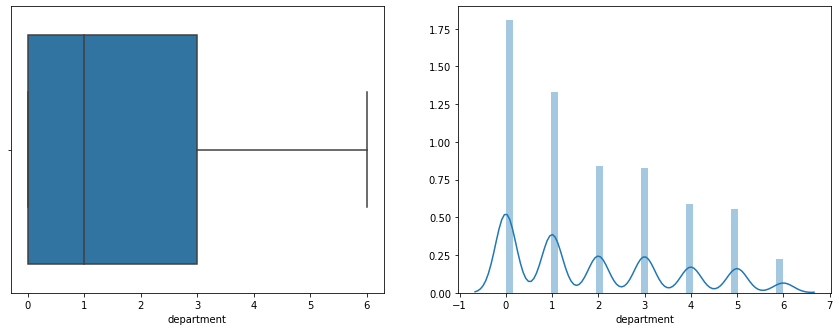

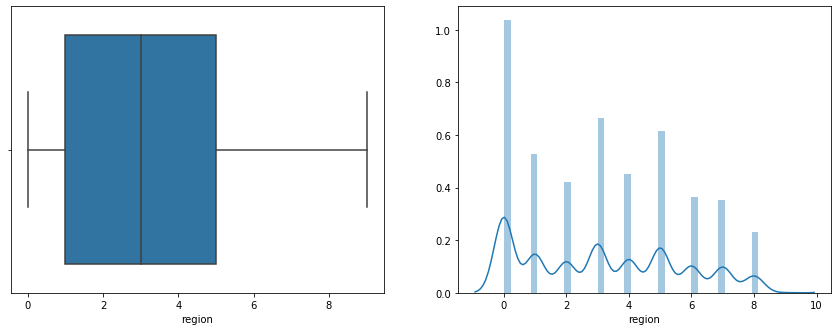

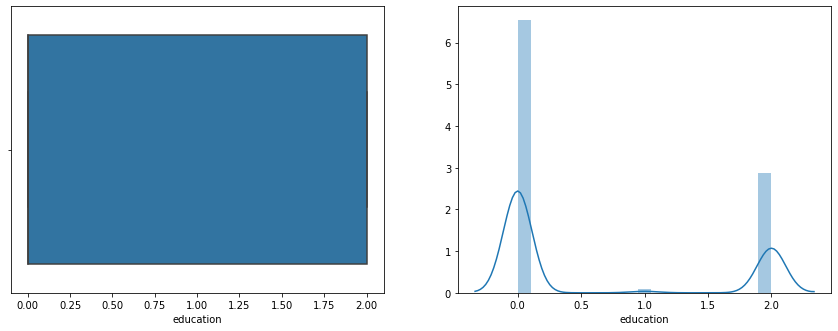

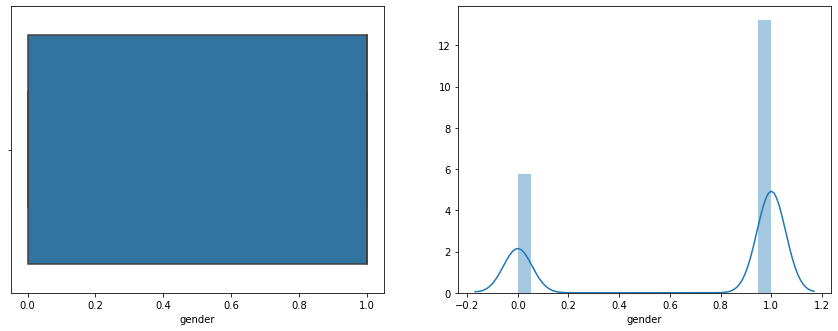

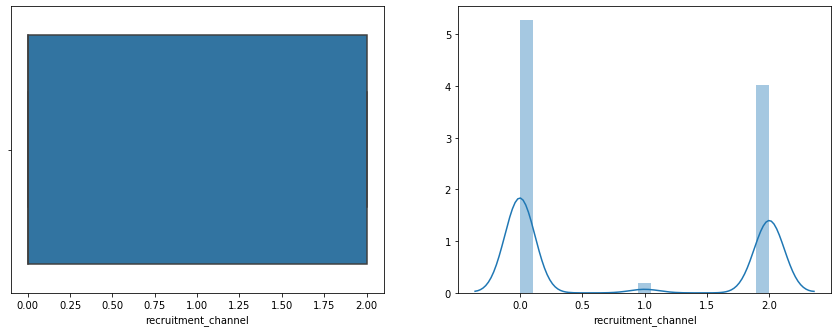

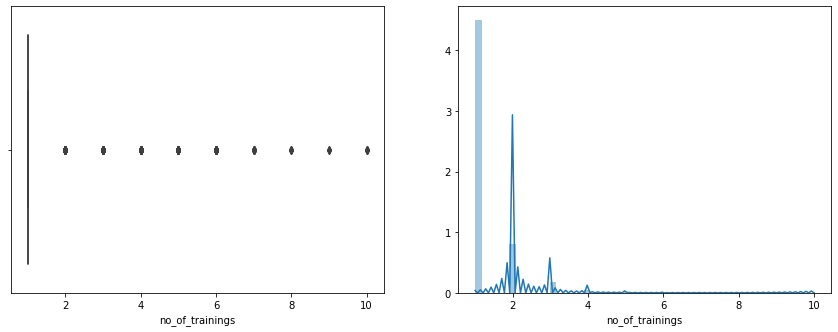

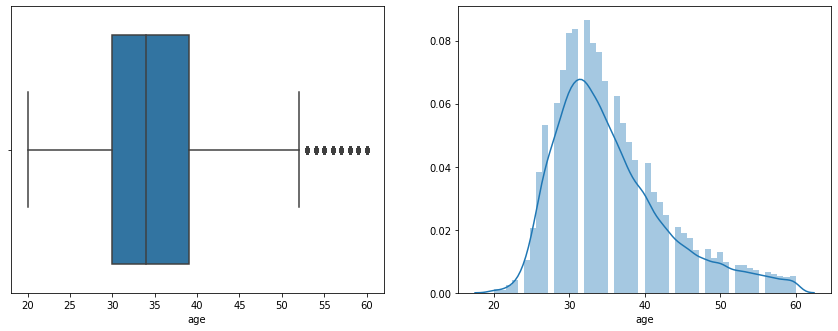

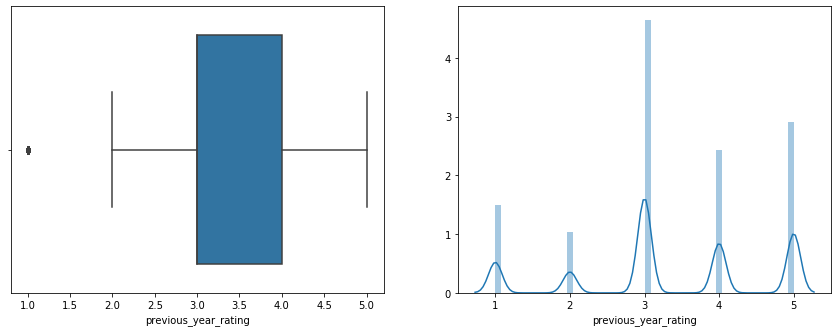

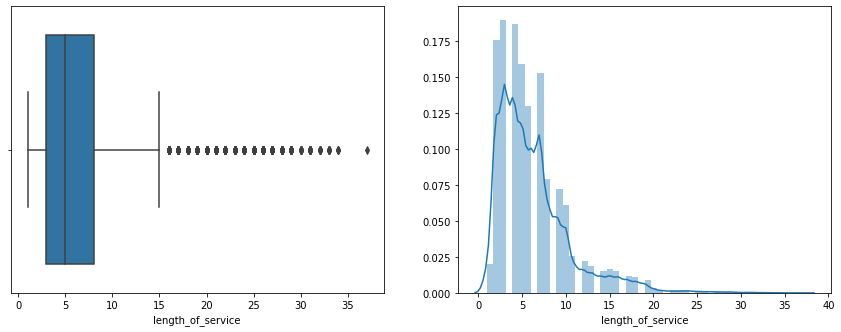

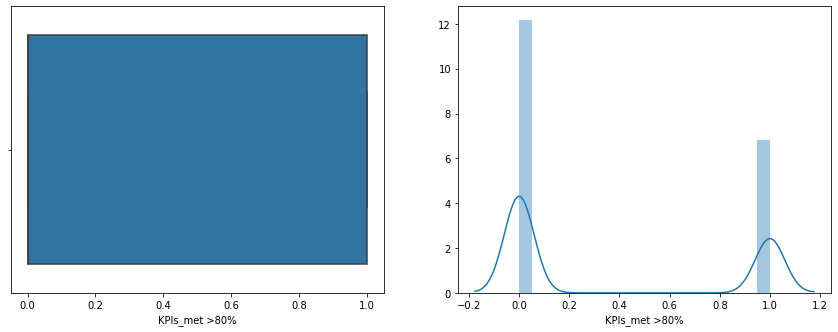

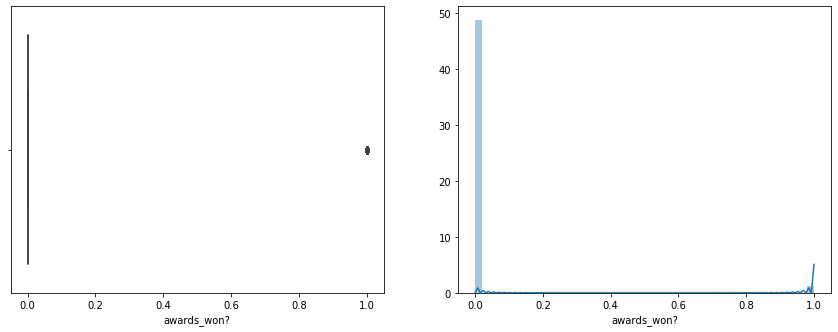

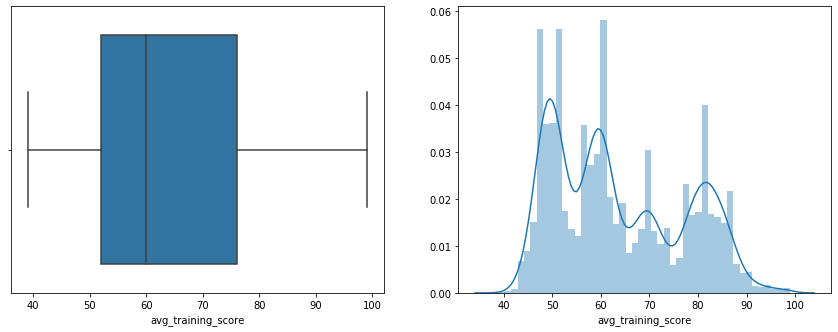

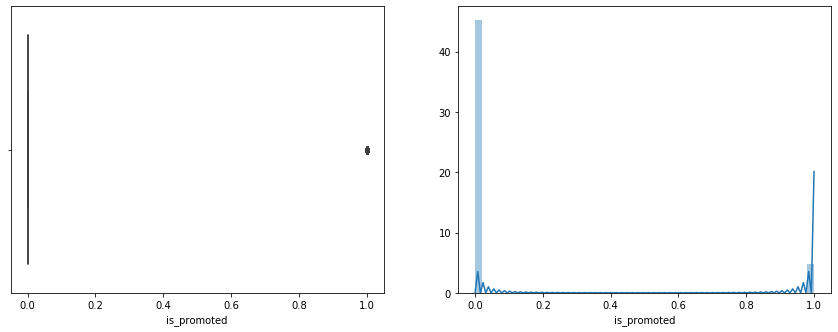

In [0]:
mdata=df
import matplotlib.pyplot as plt
import seaborn as sns
for i in mdata.columns:
    f, axes = plt.subplots(1, 2)
    f.set_size_inches(14.7, 5.27)
    sns.boxplot(mdata[i],ax=axes[0])
    sns.distplot(mdata[i],ax=axes[1])


In [0]:
for col in df.columns[0:]:
    print(col , ':' , len(df[col].unique()))

department : 7
region : 10
education : 3
gender : 2
recruitment_channel : 3
no_of_trainings : 10
age : 41
previous_year_rating : 5
length_of_service : 35
KPIs_met >80% : 2
awards_won? : 2
avg_training_score : 61
is_promoted : 2


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49096 entries, 11 to 54807
Data columns (total 13 columns):
department              49096 non-null int64
region                  49096 non-null int64
education               49096 non-null int64
gender                  49096 non-null int64
recruitment_channel     49096 non-null int64
no_of_trainings         49096 non-null int64
age                     49096 non-null int64
previous_year_rating    49096 non-null float64
length_of_service       49096 non-null int64
KPIs_met >80%           49096 non-null int64
awards_won?             49096 non-null int64
avg_training_score      49096 non-null int64
is_promoted             49096 non-null int64
dtypes: float64(1), int64(12)
memory usage: 5.2 MB


In [0]:
df_num=df[['avg_training_score', 'age']]
#df_numeric.head()
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features']=df_num.columns
vif.sort_values(by='VIF Factor',ascending=False)

,VIF Factor,Features
0,11.231952,avg_training_score
1,11.231952,age


In [0]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [0]:
df1=df[['department', 'region', 'education', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'is_promoted']]

X=df1.drop('is_promoted',axis=1)
y=df1['is_promoted']
sig=[]
notsig=[]
from scipy.stats import chi2_contingency
for i in X.columns:
    contingency_table = pd.crosstab(y,X[i],margins = True)
    stat,p,dof,expected=chi2_contingency(contingency_table)
    if p < 0.05:
        print('feature: {} is significant  and the pvalue = {} '.format(i,p))
        sig.append(i)
    else:
        print('feature: {} is not significant  and the pvalue = {} -------------------- '.format(i,p))
        notsig.append(i)

feature: department is significant  and the pvalue = 1.9333231723161262e-15 
feature: region is significant  and the pvalue = 1.6996608920177747e-30 
feature: education is significant  and the pvalue = 0.016391136853618427 
feature: recruitment_channel is significant  and the pvalue = 0.004320957598144647 
feature: no_of_trainings is significant  and the pvalue = 0.024348154944251993 
feature: age is significant  and the pvalue = 1.0057958479277273e-15 
feature: previous_year_rating is significant  and the pvalue = 6.383104658189487e-271 
feature: length_of_service is significant  and the pvalue = 3.5873939766056147e-290 
feature: KPIs_met >80% is significant  and the pvalue = 0.0 
feature: awards_won? is significant  and the pvalue = 0.0 


In [0]:
X=df.drop('is_promoted',axis=1)
y=df['is_promoted']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)

In [0]:
df.is_promoted.unique()

array([1, 0])

In [0]:

kf=KFold(n_splits=5,shuffle=True,random_state=2)
from sklearn import metrics
for model,name in zip([LR,DT,NB,RF],['Logistic','DecisionTree','Naive Bayes','KNN','RandonForest']):
    roc_auc=[]
    model.fit(Xtrain,ytrain)
    Y_predict=model.predict(Xtest)
    cm=metrics.confusion_matrix(ytest,Y_predict)
    fpr,tpr,_=roc_curve(ytest,Y_predict) 
    results = confusion_matrix(ytest, Y_predict) 
    roc_auc.append(auc(fpr,tpr))
    cr=metrics.classification_report(ytest,Y_predict)
    print ('Confusion Matrix :',results)
    print(roc_auc)
    print(cr)
    print('auc scores:{}+/-{} for {}'.format(np.mean(roc_auc),np.var(roc_auc,ddof=1),name))
    print('*'*50)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Confusion Matrix : [[13220    97]
 [ 1236   176]]
[0.558680984772919]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     13317
           1       0.64      0.12      0.21      1412

    accuracy                           0.91     14729
   macro avg       0.78      0.56      0.58     14729
weighted avg       0.89      0.91      0.88     14729

auc scores:0.558680984772919+/-nan for Logistic
**************************************************
Confusion Matrix : [[12422   895]
 [  722   690]]
[0.7107306131313976]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     13317
           1       0.44      0.49      0.46      1412

    accuracy                           0.89     14729
   macro avg       0.69      0.71      0.70     14729
weighted avg       0.90      0.89      0.89     14729

auc scores:0.7107306131313976+/-nan for DecisionTree
**************************************************


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Confusion Matrix : [[13140   177]
 [ 1232   180]]
[0.5570937358604233]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     13317
           1       0.50      0.13      0.20      1412

    accuracy                           0.90     14729
   macro avg       0.71      0.56      0.58     14729
weighted avg       0.87      0.90      0.88     14729

auc scores:0.5570937358604233+/-nan for Naive Bayes
**************************************************
Confusion Matrix : [[13241    76]
 [  946   466]]
[0.6621606687739223]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13317
           1       0.86      0.33      0.48      1412

    accuracy                           0.93     14729
   macro avg       0.90      0.66      0.72     14729
weighted avg       0.93      0.93      0.92     14729

auc scores:0.6621606687739223+/-nan for KNN
**************************************************


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,0,2,0,0,2,1,35,5.0,3,1,0,50,1
39,0,5,0,1,2,1,33,5.0,6,1,0,51,1
60,0,4,2,1,0,1,50,4.0,17,1,0,47,1
66,5,1,0,1,0,1,27,3.0,1,1,1,58,1
67,0,1,0,1,2,1,27,3.0,1,0,0,61,1


In [0]:
ytrain.head()

12738    0
10930    0
24714    0
21993    0
28921    1
Name: is_promoted, dtype: int64

In [0]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0,1,2,3,4,5,7,9,10], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(Xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [0]:

kf=KFold(n_splits=5,shuffle=True,random_state=2)
from sklearn import metrics
for model,name in zip([LR,DT,NB,RF],['Logistic','DecisionTree','Naive Bayes','RF']):
    roc_auc=[]
    
    model.fit(X_resampled, y_resampled)
    Y_predict=model.predict(Xtest)
    cm=metrics.confusion_matrix(ytest,Y_predict)
    fpr,tpr,_=roc_curve(ytest,Y_predict)
    roc_auc.append(auc(fpr,tpr))
    cr=metrics.classification_report(ytest,Y_predict)
    results = confusion_matrix(ytest, Y_predict) 
    print ('Confusion Matrix :',results)
    print(roc_auc)
    print(cr)
    print('auc scores:{}+/-{} for {}'.format(np.mean(roc_auc),np.var(roc_auc,ddof=1),name))
    print('*'*50)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Confusion Matrix : [[9916 3401]
 [ 412 1000]]
[0.7264137236670161]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     13317
           1       0.23      0.71      0.34      1412

    accuracy                           0.74     14729
   macro avg       0.59      0.73      0.59     14729
weighted avg       0.89      0.74      0.79     14729

auc scores:0.7264137236670161+/-nan for Logistic
**************************************************
Confusion Matrix : [[12291  1026]
 [  743   669]]
[0.6983758273148063]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     13317
           1       0.39      0.47      0.43      1412

    accuracy                           0.88     14729
   macro avg       0.67      0.70      0.68     14729
weighted avg       0.89      0.88      0.88     14729

auc scores:0.6983758273148063+/-nan for DecisionTree
**************************************************
Conf

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Confusion Matrix : [[12751   566]
 [  808   604]]
[0.6926299873151976]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     13317
           1       0.52      0.43      0.47      1412

    accuracy                           0.91     14729
   macro avg       0.73      0.69      0.71     14729
weighted avg       0.90      0.91      0.90     14729

auc scores:0.6926299873151976+/-nan for RF
**************************************************


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
param_grid = {
    'max_depth': [4,8,10,20,40,80,120],
    'n_estimators': [250,400,300,350]}
    
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)
# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)
print('We can get accuracy of',grid_search.best_score_,grid_search.best_params_)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [57]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=40,
                             n_estimators=100)
rfc.fit(X_resampled, y_resampled)
predictions = rfc.predict(Xtest)
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     13317
           1       0.52      0.43      0.47      1412

    accuracy                           0.91     14729
   macro avg       0.73      0.69      0.71     14729
weighted avg       0.90      0.91      0.90     14729

